# AM 205 Project


## Lotka Volterra 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import cauchy
from mpl_toolkits import mplot3d

## 2 Species - forward Euler

In [2]:
def LV(a,b,c,d,e,f,g,x0,y0):
    dt = 0.1; max_time = 100
    t = 0; x = x0; y = y0;
    t_list = []; x_list = []; y_list = []
    t_list.append(t); x_list.append(x); y_list.append(y)

    while t < max_time:
        # calc new values for t, x, y
        t = t + dt
        x = x + (-a*x + b*x*y)*dt
        y = y + (c*y  - e*y*x)*dt

        # store new values in lists
        t_list.append(t)
        x_list.append(x)
        y_list.append(y)
    return x_list, y_list, t_list

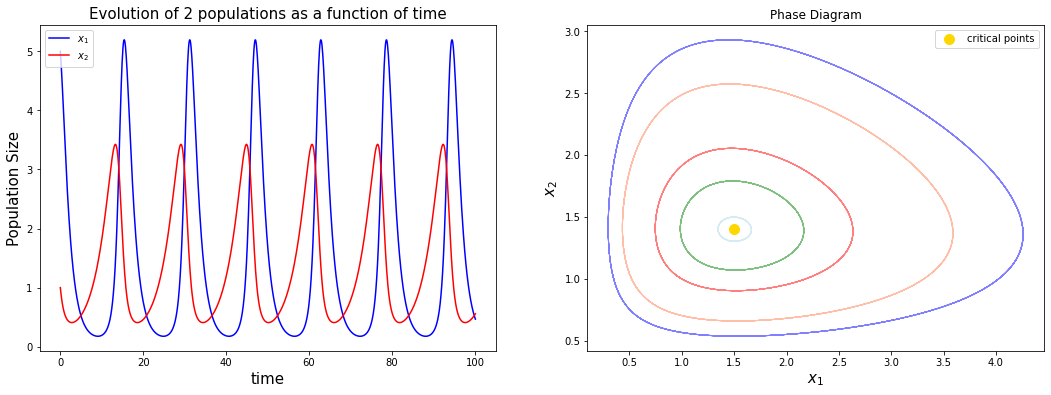

In [3]:
fig, (ax1, ax2 )= plt.subplots(1, 2, figsize = (18,6 ))

a = 0.7; b = 0.5; c = 0.3; d = 0.3; e = 0.2; f = 0.6; g = 0.2
x_list, y_list, t_list = LV(a,b,c,d,e,f,g, 5, 1)

ax1.plot(t_list, x_list,c = 'b', label = f'$x_1$')
ax1.plot(t_list, y_list,c = 'r', label = f'$x_2$')
ax1.legend(loc = 'upper left');
ax1.set_ylabel('Population Size', fontsize = 15)
ax1.set_xlabel('time', fontsize = 15)
ax1.set_title('Evolution of 2 populations as a function of time', fontsize = 15);
x0s = [1.5, 1,3, 1,2, 2.5, 1.5]
y0s = [1.5, 1,2.5, 1.5, 2.5]
colors = ["lightblue","r", "b", "g", "coral", 'gold']

for i in range(5):
    x_list, y_list, t_list = LV(a,b,c,d,e,f,g, x0s[i], y0s[i])
    ax2.plot(x_list, y_list, c =  colors[i], linewidth = 1, alpha = 0.5)
ax2.set_title('Phase Diagram')

ax2.scatter([c/e],[a/b], c = 'gold',label = 'critical points', s = 100)
ax2.scatter([0],[0], c = 'gold',s = 100)
ax2.set_xlabel('$x_1$', fontsize = 15)
ax2.set_ylabel('$x_2$', fontsize = 15);
ax2.legend();

plt.savefig('./img/2 species time evolution and phase diagram')

# 3 Species - forward euler

In [4]:
def LV3(a,b,c,d,e,f,g, dt = 0.01, max_time = 100):

    # initial time and populations
    t = 0; x = 1.0; y = 1; z = 1

    # empty lists in which to store time and populations
    t_list = []; x_list = []; y_list = []; z_list = []

    # initialize lists
    t_list.append(t); x_list.append(x); y_list.append(y); z_list.append(z)

    while t < max_time:
        # calc new values for t, x, y
        t = t + dt
        x = x + (a*x - b*x*y)*dt
        y = y + (-c*y  - e*y*z + d*y*x)*dt
        z = z + (-f*z + g*z*y)*dt

        # store new values in lists
        t_list.append(t)
        x_list.append(x)
        y_list.append(y)
        z_list.append(z)
        if y < 1e-2:
            y = 0
        if z < 1e-2:
            z = 0
        if x < 1e-2:
            x = 0
    return x_list, y_list, z_list,t_list
def plotLV3(ax, x,y,z,t):

    ax.plot(t, x, 'r', label = r'$x_0$')
    ax.plot(t, y, 'g', label = r'$x_1$')
    ax.plot(t, z, 'b', label = r'$x_2$')
    ax.legend()
    ax.set_xlabel('Time', fontsize = 15)
    ax.set_ylabel('Population Size', fontsize = 15)

def plotLV3_3d(ax, x, y, z, t, dt):
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.grid(False)
    ax.plot3D(x, y, z, 'b')
    zdata = 15*np.random.random(size = int(100/dt) + 2 )

    ax.set_xlabel(r'$x_0$', fontsize = 20)
    ax.set_ylabel(r'$x_1$', fontsize = 20)
    ax.set_zlabel(r'$x_2$', fontsize = 20);
    plt.title('Phase Diagram')

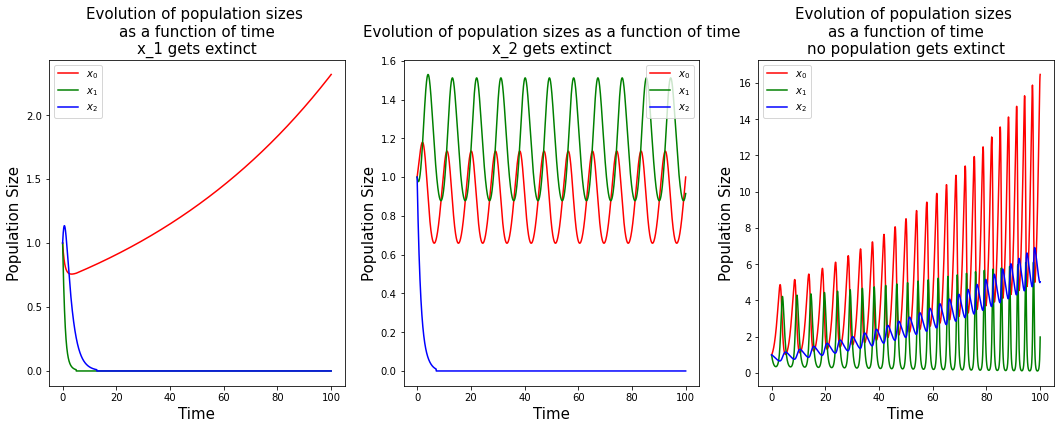

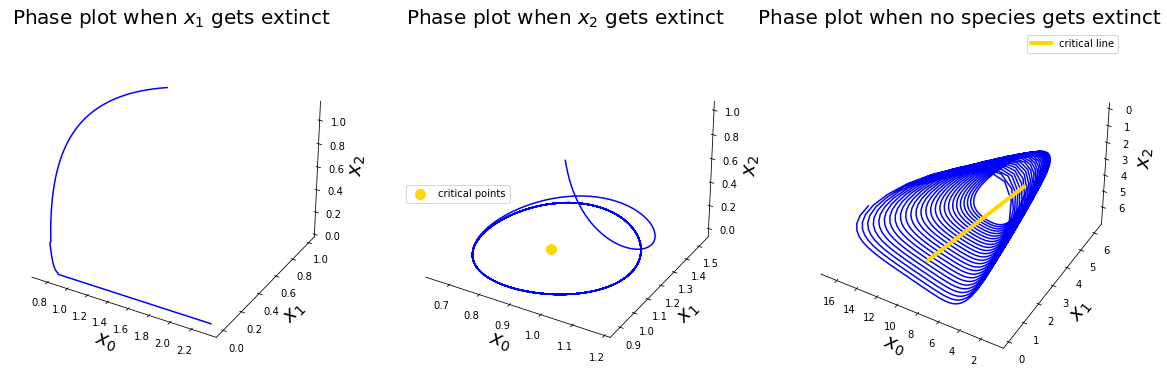

In [5]:
fig, (ax1, ax2, ax3)= plt.subplots(1, 3, figsize = (18,6))
# fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw=dict(projection='3d'), figsize = (20,20))


a,b,c,d,e,f,g = 0.011689232865487287, 0.3464266611489284, 0.9957028013415877, 0.6809992378393062, 0.6245951730187175, 0.42453072310582884, 0.8547727710500463

x_list1, y_list1, z_list1,t_list1 = LV3(a,b,c,d,e,f,g, max_time = 100)
plotLV3(ax1, x_list1, y_list1, z_list1,t_list1)
ax1.set_title('Evolution of population sizes \nas a function of time\nx_1 gets extinct', fontsize = 15);


a = 0.7; b = 0.6; c = 0.7; d = 0.8; e = 0.2; f = 0.9; g = 0.2
x_list2, y_list2, z_list2,t_list2 = LV3(a,b,c,d,e,f,g)
plotLV3(ax2, x_list2, y_list2, z_list2,t_list2 )
ax2.set_title('Evolution of population sizes as a function of time\nx_2 gets extinct', fontsize = 15);


a,b,c,d,e,f,g  = 0.8144788381988122,0.5108922056157517,0.8395579495118605, 0.6785804048689323,0.9202096941914476,0.22829592561586853,0.1651011622121209
x_list3, y_list3, z_list3,t_list3 = LV3(a,b,c,d,e,f,g, dt = 0.07, max_time = 100)
plotLV3(ax3, x_list3, y_list3, z_list3,t_list3)
ax3.set_title('Evolution of population sizes \nas a function of time\nno population gets extinct', fontsize = 15);


fig, (ax4, ax5, ax6) = plt.subplots(1, 3, subplot_kw=dict(projection='3d'), figsize = (20,20))
plotLV3_3d(ax4, x_list1, y_list1, z_list1, t_list1, dt = 0.01)
plotLV3_3d(ax5, x_list2, y_list2, z_list2,t_list2 , dt = 0.07)
plotLV3_3d(ax6, x_list3, y_list3, z_list3, t_list3, dt = 0.01)

ax4.set_title(r'Phase plot when $x_1$ gets extinct', fontsize = 20)
ax5.set_title(r'Phase plot when $x_2$ gets extinct', fontsize = 20)
ax6.set_title(r'Phase plot when no species gets extinct', fontsize = 20)

a = 0.7; b = 0.6; c = 0.7; d = 0.8; e = 0.2; f = 0.9; g = 0.2
ax5.scatter([c/d],[a/b],[0], c = 'gold',label = 'critical points', s = 100)
ax5.legend(loc = "center left")

a,b,c,d,e,f,g  = 0.8144788381988122,0.5108922056157517,0.8395579495118605, 0.6785804048689323,0.9202096941914476,0.22829592561586853,0.1651011622121209
x_sol = np.linspace(1,10, len(z_list3))
r_1 = a
r_2 = -c
r_3 = -f
c_1 = -b
c_2 = -e
b_1 = d
b_2 = g
z_sol = -(r_2 + b_1*x_sol)/c_2  
y_sol = -(r_1/c_1)*np.ones(len(z_sol))
# ax3.plot(t_list3, y_sol, c =  'gold')
# ax3.plot(t_list3, x_sol, c =  'gold')
# ax3.plot(t_list3, z_sol, c =  'gold')
ax6.plot(x_sol,y_sol,z_sol, c = 'gold', linewidth = 4,label = 'critical line')
ax6.legend(fontsize = 10)
ax6.view_init(-140, 60)


plt.savefig("./img/3_species_time_and_phase")

# n species - forward euler

In [6]:
def LV_n_forward_euler(x_0, n = 4, t_end = 100, dt = 0.1):
    x = np.zeros((n, t_end))
    x[:,0] = x_0
    
    a = np.random.uniform(0,1)*np.ones(n)
    b = np.random.uniform(0,1)*np.ones(n)
    c = np.random.uniform(0,1)*np.ones(n)
    d = np.random.uniform(0,1)*np.ones(n)
    e = np.random.uniform(0,1)*np.ones(n)
    f = np.random.uniform(0,1)*np.ones(n)
    g = np.random.uniform(0,1)*np.ones(n)
    
#     a = 0.7; b = 0.6; c = 0.7; d = 0.8; e = 0.2; f = 0.6; g = 0.2

#     a = a*np.ones(n)
#     b = b*np.ones(n)
#     c = c*np.ones(n)
#     d = d*np.ones(n)
#     e = e*np.ones(n)
#     f = f*np.ones(n)
#     g = g*np.ones(n)


    for t in range(t_end -1 ):
        for i in range(n):
            if i == 0:
                x[i, t + 1] = x[i, t] + (a[i]* x[i, t] - b[i]*x[i, t]*x[i+ 1,t])*dt
                
            elif i == n - 1:
                x[i, t + 1] = x[i, t] + (-f[i] * x[i, t] + g[i]*x[i, t]*x[i-1,t] )*dt
            else:
                x[i, t + 1] = x[i, t] + (-c[i]* x[i, t] - e[i]*x[i, t]*x[i+ 1,t] + d[i]*x[i,t]*x[i-1, t])*dt
            if x[i, t + 1] < 0:
                    x[i, t + 1] = 0
      
    return x


Our model generates interaction coefficients stochastically. 
By runing this cell multiple times, you will observe various different ecosystem evolutions.


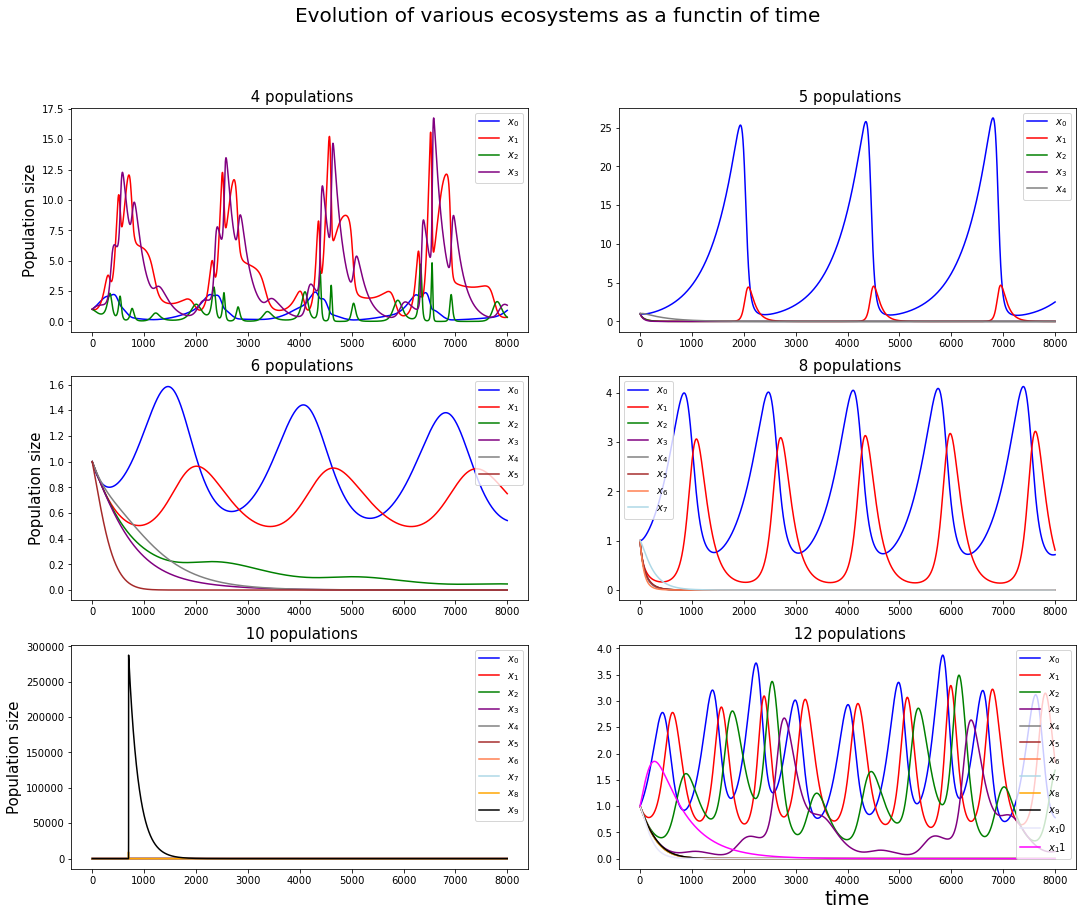

In [14]:
fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6))= plt.subplots(3, 2, figsize = (18,14))
big_colors = ['b','r', 'g','purple', 'grey', 'brown', 'coral', 'lightblue', 'orange', 'black', 'lavender','magenta']
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
ns = [4,5,6,8,10,12]
for idx, n_ in enumerate(ns):
    x0 = np.ones(n_)
    t_end = 8000
    dt = 0.01
    x = LV_n_forward_euler(x0, n_ , t_end, dt)
    if idx in [5,6]:
        axes[idx].set_xlabel('time', fontsize = 20)
    if idx in [0,2,4]:
        axes[idx].set_ylabel('Population size', fontsize = 15)
    for i in range(n_): 
        axes[idx].plot(range(t_end), x[i], label = f'$x_{i}$', c =big_colors[i])
    axes[idx].legend()
    axes[idx].set_title(f' {n_} populations', fontsize = 15);
fig.suptitle("Evolution of various ecosystems as a functin of time", fontsize=20);
plt.savefig('./img/Evolution_of_various_ecosystems')
print('Our model generates interaction coefficients stochastically. \nBy running this cell multiple times, you will observe different ecosystem evolutions.')

## 2 species - Runge Kutta 4

In [8]:
#Runge Kutta 4 solver for 2 species
def LV_RK4(a,b,c,d,e,f,g,x0,y0):
    dt = 0.01; max_time = 100
    t = 0; x = x0; y = y0; X = [x0, y0]
    t_list = []; x_list = []; y_list = []
    t_list.append(t); x_list.append(x); y_list.append(y)

    def F(X, t):
      x, y  = X
      return np.array([-a*x + b*x*y, c*y  - e*y*x])

    while t < max_time:
      # calc new values for t, x, y
      t = t + dt
      k1 = F(X, t)
      k2 = F(X + dt/2 * k1, t + dt/2)
      k3 = F(X + dt/2 * k2, t + dt/2)
      k4 = F(X + dt/2 * k3, t)
      X = X + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
      x, y  = X

      # store new values in lists
      t_list.append(t)
      x_list.append(x)
      y_list.append(y)
    return x_list, y_list, t_list

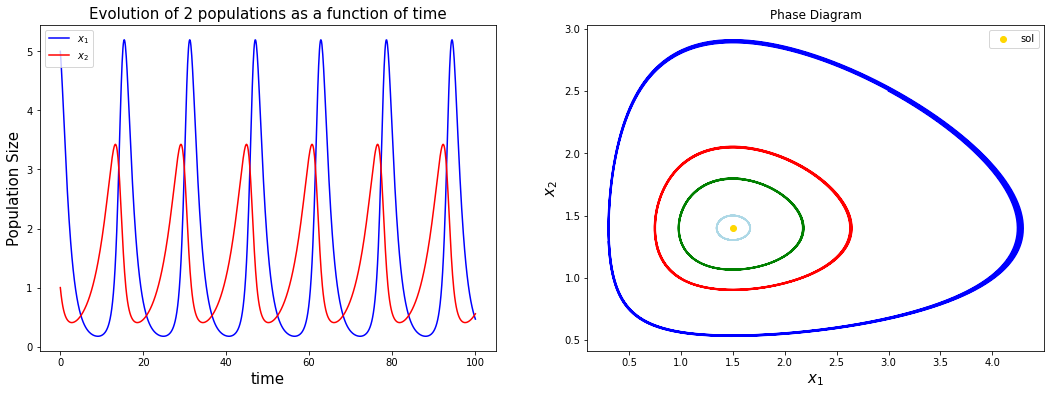

In [9]:
fig, (ax1, ax2 )= plt.subplots(1, 2, figsize = (18,6 ))

a = 0.7; b = 0.5; c = 0.3; d = 0.3; e = 0.2; f = 0.6; g = 0.2
x_list, y_list, t_list = LV(a,b,c,d,e,f,g, 5, 1)

ax1.plot(t_list, x_list,c = 'b', label = f'$x_1$')
ax1.plot(t_list, y_list,c = 'r', label = f'$x_2$')
ax1.legend(loc = 'upper left');
ax1.set_ylabel('Population Size', fontsize = 15)
ax1.set_xlabel('time', fontsize = 15)
ax1.set_title('Evolution of 2 populations as a function of time', fontsize = 15);
x0s = [1.5, 1,3, 1,2, 2.5]
y0s = [1.5, 1,2.5, 1.5]
colors = ["lightblue","r", "b", "g", "coral", 'gold']

for i in range(4):
    x_list, y_list, t_list = LV_RK4(a,b,c,d,e,f,g, x0s[i], y0s[i])
    ax2.plot(x_list, y_list, c =  colors[i])#'lightgreen')
ax2.set_title('Phase Diagram')

ax2.scatter([c/e],[a/b], c = 'gold',label = 'sol')
ax2.set_xlabel('$x_1$', fontsize = 15)
ax2.set_ylabel('$x_2$', fontsize = 15);
ax2.legend();

### n species - Runge Kutta 4

In [10]:
def Lotka_Volterra_RK4(a,b,c,d,e,f,g,X0, t_end = 100, dt = 0.1):
  n = 1 if isinstance(X0, (float, int)) else len(X0)
  Xs = np.zeros((n, t_end))
  Xs[:,0] = X0

  a = a * np.ones(n)
  b = b * np.ones(n)
  c = c * np.ones(n)
  d = d * np.ones(n)
  e = e * np.ones(n)
  f = f * np.ones(n)
  g = g * np.ones(n)

  def F(X, t):
    new_X = np.zeros(n)
    for i in range(n):
      if i == 0:
          new_X[i] = a[i]* X[i] - b[i] * X[i] * X[i+1]   
      elif i == n - 1:
          new_X[i] = -f[i] * X[i] + g[i] * X[i] * X[i-1]
      else:
          new_X[i] = -c[i] * X[i] - e[i] * X[i]* X[i+1] + d[i] * X[i] * X[i-1]
    return new_X

  for t in range(t_end -1):
    X = Xs[:, t]
    k1 = F(X, t)
    k2 = F(X + dt/2 * k1, t + dt/2)
    k3 = F(X + dt/2 * k2, t + dt/2)
    k4 = F(X + dt/2 * k3, t)
    X = X + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
    Xs[:, t + 1] =  np.maximum(X, np.zeros(n))
    
  return Xs, a, b, c, d, e, f, g

In [11]:
n = 4
t_end = 10000
dt = 0.01
max_iter = 5
X0 = np.ones(n)

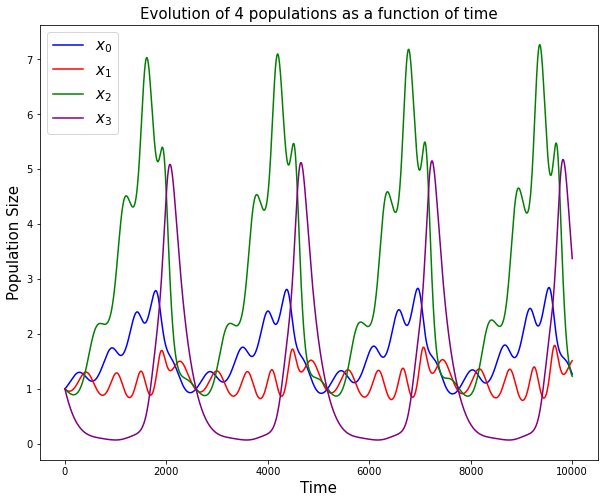

In [12]:
fig = plt.figure(figsize = (10,8))
a = 0.7; b = 0.6; c = 0.7; d = 0.8; e = 0.2; f = 0.6; g = 0.2
x ,a, b, c, d, e, f, g= Lotka_Volterra_RK4(a,b,c,d,e,f,g,X0, t_end, dt)

big_colors = ['b','r', 'g','purple', 'grey', 'brown', 'coral', 'lightblue', 'orange', 'black']
for i in range(n):
    plt.plot(range(t_end), x[i], label = f'$x_{i}$', c =big_colors[i])
    
plt.legend(loc = 'upper left', fontsize = 15)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Population Size', fontsize = 15)
plt.savefig(f'{n}_species')
plt.title(f'Evolution of {n} populations as a function of time', fontsize = 15);
plt.savefig(f'{n}_species')